<h4 align="right">by Weichao Zhou <br> with help of Brian Kulis<br> </h4>
<h1>Problem Set 5</h1>


### Problem 1: Markov Decision Process (MDP)

Markov decision process (MDP) is a discrete time stochastic control process which has been used to modele decision making problems solved via dynamic programming and reinforcement learning. We will review the formal definition of MDP and build a simple MDP model.

A Markov Decision Process (MDP) is a tuple $M = (S, A, T, \gamma, R)$.
* $S$ is a finite set of states; 
* $A$ is a set of actions; 
* $T : S \times A \times S\rightarrow [0, 1]$ is a transition function describing the probability of transitioning from one state $s\in S$ to another state by taking action $a\in A$ in state $s$; 
* $\gamma\in [0, 1)$ is a discount factor indicating how the importance of future reward attenuates.
* $R:S\times A\rightarrow \mathbb{R}$ or $R:S\rightarrow \mathbb{R}$ is a reward function which maps each state-action pair to a real number indicating the reward of being in state $s$. For simplicity, let's only consider the second case, equivalently assuming $\forall a, R(s,a)=R(s)$; 

A deterministic and stationary (or memoryless) policy $\pi : S \rightarrow A$ for an
MDP $M$ is a mapping from states to actions, i.e. the policy deterministically
selects which action to take solely based on the current state. 

A trajectory $\tau= s_0 \rightarrow s_1 \rightarrow s_2 , \ldots$, is a sequence of states where each $s_t \in S$. The accumulated reward of $\tau$ is $\sum^\infty_{t=0} \gamma^t R(s_t)$.

Value function $V_\pi : S \rightarrow \mathbb{R}$ measures the expectation of accumulated reward starting from $s_0$ and following policy $\pi$. $$V_\pi(s_0)= \mathbb{E}_\pi[\sum^\infty_{t=0} \gamma^t R(s_t)]$$. 

Q-function $Q_\pi: S\times A\rightarrow \mathbb{R}$ measures the expectation of accumulated reward of performing action $a_0\in A$ in state $s_0\in S$ at first step and then following policy $\pi$ afterwards. $$Q_\pi(s_0, a_0)= R(s_0) +  \gamma\cdot\sum_{s_1\in S}T(s_0, a_0, s_1)\mathbb{E}_\pi[\sum^\infty_{t=1} \gamma^{t-1} R(s_t)]$$ 

According to **``Bellman Equations``**, for all $s\in S, a\in A$, $V_\pi$ and $Q_\pi$ satisfies:
* $V_\pi(s)=R(s)+\gamma\sum_{s'}T(s, \pi(s), s')V_\pi(s')$
* $Q_\pi(s,a)=R(s)+\gamma\sum_{s'}T(s, a, s') V_\pi(s')$


An optimal policy $\pi$ for MDP $M$ is a policy that maximizes the Q-function at every state: 
* $\pi(s)\in argmax_{a\in A} Q_\pi(s,a)$

**Q1.1**: For an MDP with finite state space and action space, we can use matrices to represent the mapping relations for transition function, reward function, policy, value function and Q-function. Please find the `mdp.py` file and finish the function below that implements the second Bellman equation as shown above. This function should take a value function(matrix) as input, solve the corresponding Q-function(matrix), then output a myopic policy $argmax_{a\in A} Q(s,a)$ as well as its corresponding state-action value $max_{a\in A} Q(s,a)$.

In [1]:
from __future__ import division
import math
import sys
import random

import numpy as np
import scipy.sparse as sp

import matplotlib.pyplot as plt
import pylab

from mdp import MDP

    
def BellmanUpdate(self, V=None):
    # Apply the Bellman operation on the value function V to make a single
    # update on the value function and policy.
    #
    # Returns: (policy, value), tuple of improved policy and its value
    #
    if V is None:
        # this V should be a reference to the data rather than a copy
        V = self.V
    
    try:
        assert V.shape in ((self.S,), (1, self.S)), (
        "Warning: shape of V is not right shape.")
    except AttributeError:
        raise TypeError("V must be a numpy array or matrix.")
    ## Initialize an empty Q-function
    Q = np.empty((self.A, self.S))

    ## Implement the second Bellman Equation: use reward function and value function 
    ## to represent the Q-function.

    ## >>>>>>>>>>>>>>>>>>>>>code required<<<<<<<<<<<<<<<<<<<<<<<<<<##
#     raise Exception("At most two line of code is needed here. \
#     Refer to the secton Bellman Equation mentioned above. \
#     Solve the Q-function by using reward function self.M.R, \
#     transition function self.M.T \
#     and value function V.")
    Q =   np.matmul(self.T, V)*self.gamma + self.R 
    ## >>>>>>>>>>>>>>>>>>>>>code required<<<<<<<<<<<<<<<<<<<<<<<<<<##
    
    return (Q.argmax(axis=0), Q.max(axis=0))

MDP.BellmanUpdate = BellmanUpdate

**Q1.2:** Now we have a $8\times 8$ Grid World based on the MDP we built in Q1.1. An agent can start from the upper-left corner and moves from cell to cell until it reaches the lower-right corner. At each step, the agent can choose to stay in current cell or move to an adjacent cell but with 20% chance of moving randomly. Please run the following code to draw a reward mapping of the grid world in grey scale and draw a reward-state plot with its y-axle being the reward and the x-axle being the state index. Think about how to solve a policy that can maximally gain the accumulated rewards. Note that light cells have higher rewards than dark cells. The program for the grid world can be found in `mdp.py` file.

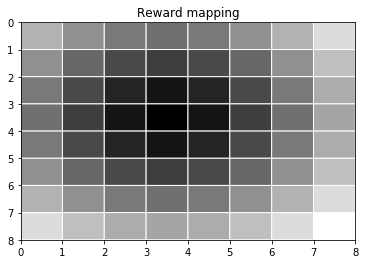

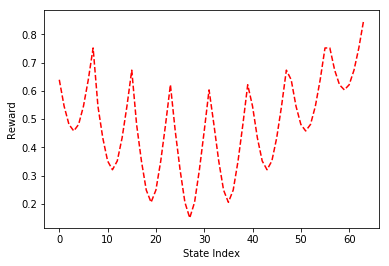

In [2]:
from mdp import gridworld 


###Let's draw the gridworld
grids = gridworld(8)

###Let's draw the reward mapping of the gridworld
grids.draw_grids()

###Let's draw a plot of the rewards. 
##The x-axle is the index of states.
##The y-axle is the reward.
grids.draw_plot(rewards = grids.M.R)


### Problem 2: Policy Iteration Algorithm

In this problem set, we will implement policy iteration algorithm. Recall the policy iteration algorithm. Please find the `PolicyIteration` class in `mdp.py`. The algorithm is based on the MDP we have previously built. Especially, the `BellmanUpdate` function in **Q1.1** will be used.

**Q2.1:** Complete the function below. The goal is to calculate the value function of a given policy through iteration. When the policy is given, the transition probability becomes $P(s, s')= T(s, \pi(s), s')$. Use $P$ and reward function $R$ to solve 

In [3]:
from mdp import PolicyIteration

def ValueUpdate(self, epsilon = 1E-10, max_iter = 10000):
        # Calculate the value function of the policy iteratively.
        #
        # Observe the Bellman Equation.
        # The policy, rewards, transition probabilities are all given.
        # Value function can be calculated iteratively until convergence.
        # Think about why does it converge?????
        if epsilon is None:
            epsilon = self.M.epsilon
        if max_iter is None:
            max_iter = self.M.max_iter  
            
        # The transition probability determined by the policy
        P = self.TransitionUpdate()
        assert P.shape == (self.M.S, self.M.S)
        # Reset the Value function to be equal to the Reward function
        self.M.V = self.M.R.copy()
        
        itr = 0
        
        ## >>>>>>>>>>>>>>>>>>>>>code required<<<<<<<<<<<<<<<<<<<<<<<<<<##
        for i in range(max_iter):
            temp = self.M.gamma*np.matmul(P, self.M.R)
            if all(abs(temp)) <= epsilon:
                break
            else:
                self.M.V += temp
                
        ## >>>>>>>>>>>>>>>>>>>>>code required<<<<<<<<<<<<<<<<<<<<<<<<<<##
        return self.M.V

PolicyIteration.ValueUpdate = ValueUpdate

**Q2.2:** Implement the policy iteration algorithm to solve the optimal policy for the $8\times 8$ grid world. Please run the following code to draw the value mapping in grey scale, the value-state plot as well as the optimal policy diagram where different actions are indicated by different colors.

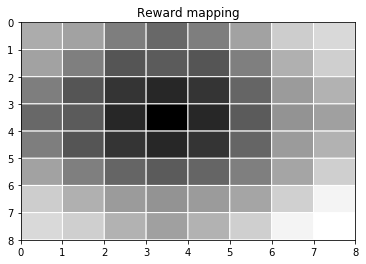

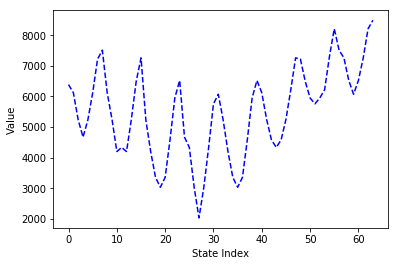

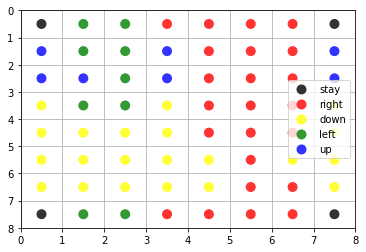

In [4]:
###Let's initialize a Reinforcement Learning agent that implement Policy Iteration
agent = PolicyIteration(grids.M, policy_init = None)
agent.iterate()

###Let's draw the value mapping of the gridworld
grids.draw_grids(grids.M.V)

###Let's draw the value plot of the states
grids.draw_plot(values = grids.M.V)

###Let's draw the optimal policy of the gridworld
grids.draw_policy()

**Q2.3:** Besides using dynamic programming, we can solve value function of a given policy through a linear equation. Observe  Bellman Equation and note that the value function, transition probabilities and reward functions are all matricies. Please use **one line** of code to solve the value function of a given policy.

In [5]:
def ValueUpdate_LQ(self):
    # Calculate the value function of the policy by solving a linear equation.
    #
    # Observe the Bellman Equation. 
    # The policy, rewards, transition probabilities are all given. 
    # Can you solve the value function(matrix) by solving a linear equation?
    # Think about how to do it. 
    
    P = self.TransitionUpdate()
    
    ## >>>>>>>>>>>>>>>>>>>>>code required<<<<<<<<<<<<<<<<<<<<<<<<<<##
    self.M.V = self.M.R + self.M.gamma* (np.matmul(P, self.M.V))
    ## >>>>>>>>>>>>>>>>>>>>>code required<<<<<<<<<<<<<<<<<<<<<<<<<<##
    return self.M.V

PolicyIteration.ValueUpdate = ValueUpdate_LQ

**Q2.4:** Use the code in Q2.3 to replace the function in Q2.1 and Redo Q2.2. The generated graphs should be almost the same as Q2.2.

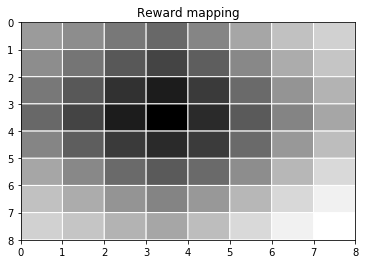

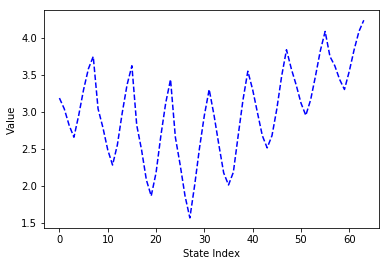

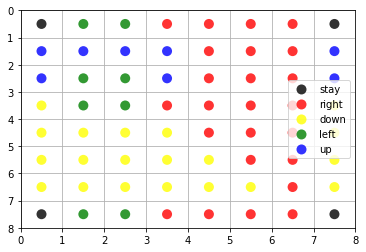

In [6]:
###Let's initialize a Reinforcement Learning agent that implement Policy Iteration
grids = None
agent = None

grids = gridworld(8)
agent = PolicyIteration(grids.M, policy_init = None)
agent.iterate()

###Let's draw the value mapping of the gridworld
grids.draw_grids(grids.M.V)

###Let's draw the value plot of the states
grids.draw_plot(values = grids.M.V)

###Let's draw the optimal policy of the gridworld
grids.draw_policy()

### Problem 3: Deep Q-Learning

Policy Iteration may be efficient in solving small scale RL problems where the transition model is given. However, it is expensive to solve large scale RL problem where transition function is not explicitly known. In this problem set, we will use deep Q-learning to solve an optimal policy for a large grid world. Now we wrap up the grid world and treat it as an unknown environment. A learning agent can interact with the environment by performing an actions and receiving from the environment an observation(or state), reward and other information. Please run the program below to observe how the interaction works. Although the size of grid world is set to 50x50, you can change it to any large number as you like. Just be aware that when the size is too large, the environment may takes longer time to give the feed back. 

In [7]:
from mdp import wrapper
import random

## First wrap the gridworld
env = wrapper(gridworld(50))
num_actions = env.num_actions()

# Just run the code and observe the data types and shapes of the variables
state = env.reset()
for j in range(10):
    action = random.randint(0, num_actions - 1)
    state_, reward, done, _ = env.step(action)
    print("From state:{}, perform action:{}, to state:{}, get reward:{} ".format(state, action, state_, reward))
    state = state_.copy()
    if done:
        break 


From state:[0], perform action:3, to state:[1], get reward:[0.91435099] 
From state:[1], perform action:0, to state:[1], get reward:[0.91435099] 
From state:[1], perform action:3, to state:[0], get reward:[0.93359397] 
From state:[0], perform action:0, to state:[0], get reward:[0.93359397] 
From state:[0], perform action:3, to state:[50], get reward:[0.91435099] 
From state:[50], perform action:3, to state:[51], get reward:[0.89469423] 
From state:[51], perform action:1, to state:[52], get reward:[0.87546043] 
From state:[52], perform action:2, to state:[102], get reward:[0.85579448] 
From state:[102], perform action:1, to state:[103], get reward:[0.83657073] 
From state:[103], perform action:3, to state:[102], get reward:[0.85579448] 


**Q3.1:** Now let's build a simple Deep Q-network. Please make sure that torch is installed in your computer. Use the function below to design the network layers. You can use MLP, CNN, or whatever you like. But make sure that you understand <a href="https://www.nature.com/articles/nature14236.pdf">how DQN works</a>, especially what are the input and output. **You are only required to build the neural network layers.** Please refer to the example.

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as func

## Theoretically, you can build what ever network as you like, 
## but make sure that the I/O size must be compatible.

class Q_Network(nn.Module):
    def __init__(self, input_size, output_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            input_size (int): What is the input of the Q Network?? What is the size of the input???
            output_size (int): What is the output of the Q Network?? What is the size of the output???
            seed (int): Random seed
        Example
        =======
        self.l1 = nn.Linear(input_size, 16)
        self.l2 = nn.Linear(16, output_size)
        """
        super(Q_Network, self).__init__()
        self.seed = torch.manual_seed(seed)
        
        ## >>>>>>>>>>>>>>>>>>>>>code required<<<<<<<<<<<<<<<<<<<<<<<<<<##
        self.l1 = nn.Linear(input_size, 16)
        self.l2 = nn.Linear(16, output_size)
        ## >>>>>>>>>>>>>>>>>>>>>code required<<<<<<<<<<<<<<<<<<<<<<<<<<##
    def forward(self, input_data):
        """Build a network that maps input -> output.
        Example
        =======            
        x = func.relu(self.l1(input_data))
        x = func.relu(self.l2(x))
        return x
        """
        ## >>>>>>>>>>>>>>>>>>>>>code required<<<<<<<<<<<<<<<<<<<<<<<<<<##
        x = func.relu(self.l1(input_data))
        x = func.relu(self.l2(x))
        return x
        ## >>>>>>>>>>>>>>>>>>>>>code required<<<<<<<<<<<<<<<<<<<<<<<<<<##
        
        

**Q3.2**: Now let's build a simple DQN agent. The agent will 

* interact with the environment
* use Q-Network to choose actions

You are only required to finish a few lines of code. After a batch of experiences are read from the buffer, what should the neural network do next? How to define the loss function? Please understand what the classes and functions are doing. You can change the parameters as you like.

In the end, please 
* **write down the loss function of Deep-Q-Learning Network**
* **explain why do we need two Q-networks in this model.**

In [9]:
import torch
import torch.nn.functional as func
import torch.optim as optim
import torch.nn.functional as F
from collections import namedtuple, deque

batch_size = 10000 #How many experiences to use for each training step.
update_freq = 4 #How often to perform a training step.
gamma = .99 #Discount factor on the target Q-values
e_start = 1.0 #Starting chance of random action
e_end = 0.001 #Final chance of random action
annealing_steps = 100. #How many steps of training to reduce startE to endE.
num_episodes = 200 #How many episodes of game environment to train network with.
max_epLength = 300 #The max allowed length of our episode.
h_size = 512 #The size of the final convolutional layer before splitting it into Advantage and Value streams.
tau = 0.001 #Rate to update target network toward primary network

e = e_start
e_rate = (e_start - e_end)/annealing_steps

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")   

Episode 0	Average Reward: 263.75
Episode 100	Average Reward: 273.53
Episode 199	Average Reward: 280.08

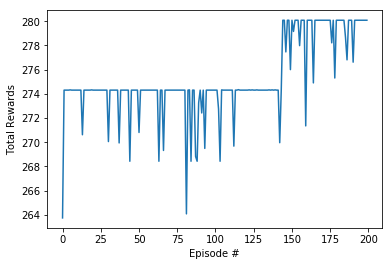

In [10]:
class experience_buffer():
    def __init__(self, buffer_size = 50000):
        # Define memory stack
        self.memory = deque(maxlen=buffer_size)
        # Each experience is a named tuple 
        self.to_experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        
    def add(self, state, action, reward, next_state, done):
        # Add experience to the memory stack
        self.memory.append(self.to_experience(state, action, reward, next_state, done))
            
    def sample(self, size):
        # Randomly choose k experiences
        experiences = random.sample(self.memory, k = size)
        # Extract the elements of the experiences 
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
  
        return (states, actions, rewards, next_states, dones)
    def __len__(self):
        #Return the current size of internal memory.
        return len(self.memory)



class dqn_agent(object):
    def __init__(self, state_size = 1, action_size = 5, seed = 0):
        # The size of each state returned by the environment
        self.state_size = state_size
        
        # The size of the action to be output to the environment
        self.action_size = action_size
        
        self.seed = seed
        
        # Define two Q-networks
        self.qnetwork = Q_Network(state_size, action_size, self.seed).to(device)
        self.qnetwork_target = Q_Network(state_size, action_size, self.seed).to(device)
        
        # Define optimizer for one of the Q-networks
        self.optimizer = optim.Adam(self.qnetwork.parameters(), lr=1e-4)

        # Define a memory buffer to store experiences
        self.myBuffer = experience_buffer()

    def choose_action(self, state, epsilon = None):
        # Choose one action according to the current state
        
        if epsilon is None:
            epsilon = eps
        
        # Feed the input
#         print(state.shape)
        state = torch.from_numpy(state).float().to(device)
#         print(state.shape)
        self.qnetwork.eval()
        with torch.no_grad():
            Q_value = self.qnetwork(state)
        self.qnetwork.train()

        # Epsilon-greedy action selection
        max_action = np.argmax(Q_value.cpu().data.numpy())
        random_action = random.choice(np.arange(self.action_size))
        if random.random() > epsilon:
            action = max_action
        else:
            action = random_action
            
        return action, max_action
    
    def optimize(self):
        # Feed experience to the buffer if it is not full
        if len(self.myBuffer) < batch_size:
            return
        
        #Get a random batch of experiences.
        states, actions, rewards, next_states, dones = self.myBuffer.sample(batch_size) 
       
        # Get max predicted Q values (for next states) from target model
        ## >>>>>>>>>>>>>>>>>>>>>code required<<<<<<<<<<<<<<<<<<<<<<<<<<##
        self.qnetwork_target.eval()
        with torch.no_grad():
            Q_dash = self.qnetwork_target(next_states)
            Q_dash_max = torch.max(Q_dash, dim=1, keepdim=True)[0]
            y = (rewards + gamma * Q_dash_max - (Q_dash * dones))**2
            
        self.qnetwork_target.train()
        Q = self.qnetwork(states)
        y_pred = Q.gather(1, actions)
        
        loss = torch.sum((y - y_pred)**2)
        ## >>>>>>>>>>>>>>>>>>>>>code required<<<<<<<<<<<<<<<<<<<<<<<<<<##
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        for target_param, param in zip(self.qnetwork_target.parameters(), self.qnetwork.parameters()):
            target_param.data.copy_(tau*param.data + (1.0-tau)*target_param.data)

        
def train(agent): 
    #create lists to contain total rewards
    total_rewards = []
    total_steps = 0
    e = e_start
    for i in range(num_episodes):
        #Reset environment and get first new observation
        state = env.reset()
#         print(i)
        state = state = env.reset()
#         state = np.ones([16,2,2])
#         print(state.shape)
#         print(state)
        done = False
        total_reward = 0
        j = 0
        #The Q-Network
#         print(max_epLength)
        while j < max_epLength: #If the agent takes longer than max_epLength moves to reach either of the blocks, end the trial.
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
#             print(j)
#             print(state.shape)
            action, _ = agent.choose_action(state, e)
            
            e = max(e_end, e - e_rate)
#             print(action)
            next_state, reward, done, _ = env.step(action)

            #Save the experience to our episode buffer.
            agent.myBuffer.add(state, action, reward, next_state, done) 

            if total_steps % (update_freq) == 0:
                agent.optimize()

            total_steps += 1
            total_reward += reward
            state = next_state
            
            if done == True:
                break

        total_rewards.append(total_reward)
        #Periodically save the model. 
        print('\rEpisode {}\tAverage Reward: {:.2f}'.format(i, np.mean(total_reward[-10:])), end="")
        if i % 100 == 0:
            print('\rEpisode {}\tAverage Reward: {:.2f}'.format(i, np.mean(total_rewards)))
        if np.mean(total_rewards)>=max_epLength:
            print('\nEnvironment solved in {:d} episodes!\tAverage reward: {:.2f}'.format(i-100, np.mean(total_rewards)))
            break
    torch.save(agent.qnetwork.state_dict(), 'checkpoint.pth')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(total_rewards)), total_rewards)
    plt.ylabel('Total Rewards')
    plt.xlabel('Episode #')
    plt.show()
                
agent = dqn_agent()
train(agent)


**Answer:**
    
Loss:
$$L = \frac{1}{2}(Bellman-Q(s,a))^2$$ 
$$L(\phi) = \frac{1}{2}(R(s,a,s′) + γmaxQ(s′,a′;θ) - Q(s,a;θ))^2$$

Note: The loss functions were obtained from

https://danieltakeshi.github.io/2016/12/01/going-deeper-into-reinforcement-learning-understanding-dqn/

Using two Q-networks it solves the problem overestimating Q values. When computing the Q the two networks decouple the action selection from the target Q value generation. The DQN network is used to select the best action to take for the next state and the target network calculates the target Q value of taking that action in the next state. This is how it reduces the overestimation of Q values.

**Q3.3** Check how good the DQN works. Enumerate all the states in the grid world and use the trained DQN to select the action for each state. Then draw the reward mapping graph and policy diagram. It is your freedom to change the parameters and structure of the DQN, or even rewrite the entire program. 

In [ ]:
# load the weights from file

agent.qnetwork.load_state_dict(torch.load('checkpoint.pth'))

policy = list()
for state in range(env.num_states()):
    ##>>>>>>>>>>>>Code Required<<<<<<<<<<<<
    action = dqn_agent().choose_action(np.array([state]),e)
    ##>>>>>>>>>>>>Code Required<<<<<<<<<<<<
    policy.append(action)
    
env.render_rewards()
env.render_policy(policy)

### Problem 4: Actor-Critic Algorithm

**Q4.1** Understand what is actor-critic learning. Please review the slides or search materials on line by yourself and
* **write down the loss functions** 
* **explain what do actor and critic respectively mean in this algorithm.**

**Answer:**

$$L(\phi) = \frac{1}{2}\sum _i \|\hat{ V}^{\pi}_{\phi}(s_i)-y_i\|^2$$ 

Note: This is found in professor Kulis lecture 21 on slide 14.


Actor  updates the policy paramters to improve the current policy. The critic computes the value of taking each action at each state, which is used to evaluate the current policy.


**Q4.2**. Install Atari Emulator from <a href="https://github.com/mgbellemare/Arcade-Learning-Environment">here</a>. Use a pretrained actor-critic neural network model to play the breakout game. Run the program. There will be a gif image generated in the current folder. Feel free to implement your own deep actor-critic learning agent or use the DQN we have built in Problem 3.

In [ ]:
import tensorflow as tf
import numpy as np
import random
import os


from atari_emulator import AtariEmulator
from ale_python_interface import ALEInterface
import imagio

BIN = "atari_roms/breakout.bin"
noops = 30
test_count = 1

writer = imagio.get_writer('breakout.gif', fps = 30)

def append_frame(frame):
    writer.append_data(frame)

def create_environment():
    ale_int = ALEInterface()
    ale_int.loadROM(str.encode(BIN))
    num_actions = len(ale_int.getMinimalActionSet())
    return AtariEmulator(BIN), num_actions


def choose_next_actions(num_actions, states, session):
    policy, value = session.run(['local_learning_2/actor_output_policy:0', 'local_learning_2/critic_output_out:0'], feed_dict = {'local_learning/input:0': states})
    policy = policy - np.finfo(np.float32).epsneg

    action_indices = [int(np.nonzero(np.random.multinomial(1, p))[0]) for p in policy]

    new_actions = np.eye(num_actions)[action_indices]

    return new_actions, value, policy


def run():
    environment, num_actions = create_environment()
    environment.on_new_frame = append_frame
    
    checkpoints_ = "pretrained/breakout/checkpoints/"
    with tf.Session() as sess:
        meta_ = os.path.join(checkpoints_, "ac.meta")

        saver = tf.train.import_meta_graph(meta_)
        saver.restore(sess, tf.train.latest_checkpoint(checkpoints_))

        states = np.array([environment.get_initial_state()])
        if noops != 0:
            for _ in range(random.randint(0, noops)):
                state, _, _ = environment.next(environment.get_noop())

        episodes_over = np.zeros(test_count, dtype=np.bool)
        rewards = np.zeros(1, dtype=np.float32)
        while not all(episodes_over):
            actions, _, _ = choose_next_actions(num_actions, states, sess)

            state, reward, episode_over = environment.next(actions[0])
            states = np.array([state])
            rewards[0] += reward
            episodes_over[0] = episode_over

        print('Performed {} tests for breakout.'.format(test_count))
        print('Mean: {0:.2f}'.format(np.mean(rewards)))
        print('Min: {0:.2f}'.format(np.min(rewards)))
        print('Max: {0:.2f}'.format(np.max(rewards)))
        print('Std: {0:.2f}'.format(np.std(rewards)))

run()

from IPython.display import HTML
HTML('<img src="breakout.gif">')